<a href="https://colab.research.google.com/github/ritvikshrivastava/ULMFiT/blob/master/basic_ulmfit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
    100% |████████████████████████████████| 576.2MB 25kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x62350000 @  0x7f125199c2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 143kB 8.8MB/s 
    100% |████████████████████████████████| 23.3MB 1.4MB/s 
    100% |████████████████████████████████| 112kB 30.6MB/s 
    100% |████████████████████████████████| 591.8MB 28kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x6103e000 @  0x7fae03cac2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28

In [0]:
# import libraries
import fastai
from fastai import *
from fastai.text import * 
import pandas as pd
import numpy as np
from functools import partial
import io
import os

In [0]:
#import dataset
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [0]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [0]:
# create a dataframe
df = pd.DataFrame({'label':dataset.target,
                   'text':dataset.data})

In [0]:
df.shape
df

,label,text
0,10,"Well, I will have to change the scoring on my ..."
1,1,Archive-name: graphics/resources-list/part1\nL...
2,10,"\nAnd of course, Mike Ramsey was (at one time)..."
3,10,"As I promised, I would give you the name of th..."
4,10,GAME(S) OF 4/15\n---------------\nADIRONDACK 6...
5,1,"Hi,\n\nI'm interested in writing a program to ..."
6,10,"You think that's bad? I'm in Bowling Green, O..."
7,10,] \tAnyone who really believes that the Caps c...
8,10,^^^^^^^^^^^^^^^^^^^^^^^^\n ...
9,10,\nChris Chelios was Montreal's co-captain with...


In [0]:
df = df[df['label'].isin([1,10])]
df = df.reset_index(drop = True)

In [0]:
df['label'].value_counts()

10    600
1     584
Name: label, dtype: int64

### Preprocessing

In [0]:
df['text'] = df['text'].str.replace("[^a-zA-Z]", " ")

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from nltk.corpus import stopwords 
stop_words = stopwords.words('english') 

In [0]:
# tokenization 
tokenized_doc = df['text'].apply(lambda x: x.split())

# remove stop-words 
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words]) 

# de-tokenization 
detokenized_doc = [] 
for i in range(len(df)): 
    t = ' '.join(tokenized_doc[i]) 
    detokenized_doc.append(t) 
df['text'] = detokenized_doc

In [0]:
from sklearn.model_selection import train_test_split

# split data into training and validation set
df_trn, df_val = train_test_split(df, stratify = df['label'], test_size = 0.4, random_state = 12)

In [0]:
df_trn.shape, df_val.shape

((710, 2), (474, 2))

### Data Preparation

In [0]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "")

# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df_trn, valid_df = df_val, vocab=data_lm.train_ds.vocab, bs=32)

In [0]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103, drop_mult=0.7)
learn

LanguageLearner(data=TextLMDataBunch;

Train: LabelList
y: LMLabel (710 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: .
x: LMTextList (710 items)
[Text xxbos xxfld 1 xxmaj it looks like xxmaj edmonton xxmaj oilers decided take xxmaj european xxunk xxunk xxmaj ranford xxmaj xxunk xxmaj xxunk xxmaj manson xxmaj smith xxmaj buchberger xxmaj corson playing xxmaj canada xxmaj podein xxmaj weight playing xxup us xxmaj is xxmaj kravchuk playing xxmaj xxunk i know xxunk injuries late season xxmaj podein interesting case eligible play xxmaj cape xxmaj breton xxup ahl playoffs like xxmaj kovalev xxmaj zubov xxmaj andersson obviously xxmaj xxunk xxmaj pocklington total xxunk everyone makes certainly case xxunk xxunk xxmaj xxunk xxmaj new xxmaj york xxmaj rangers, Text xxbos xxfld 1 xxmaj this xxunk xxmaj speaking die hard i i read xxunk hard xxunk xxmaj toronto xxmaj cup finals xxmaj first anyone xxunk heard team xxmaj detroit xxmaj al xxmaj xxunk however xxunk idio

In [0]:
# train the learner object
learn.fit_one_cycle(10, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,6.719040,5.823264,0.162865
2,6.279420,5.314230,0.218299
3,5.904190,5.073812,0.260069
4,5.613376,4.934468,0.281332
5,5.380461,4.864070,0.285399
6,5.196227,4.793166,0.287984
7,5.040635,4.786770,0.290341
8,4.909262,4.757754,0.291232
9,4.824049,4.751489,0.292557
10,4.768834,4.750281,0.292321


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


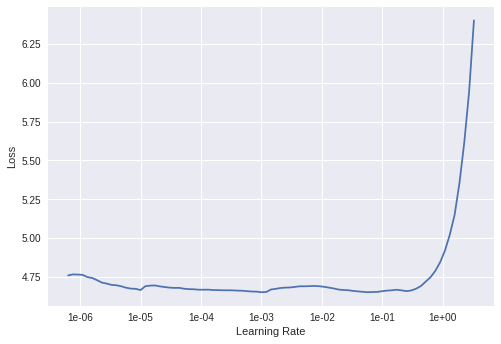

In [0]:
learn.recorder.plot()

In [0]:
learn.save_encoder('ft_enc')

In [0]:
learn = text_classifier_learner(data_clas, drop_mult=0.7)
learn.load_encoder('ft_enc')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


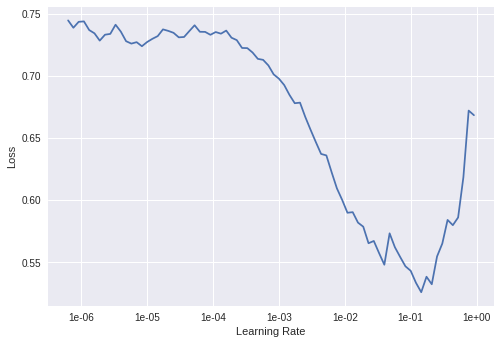

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.465214,0.211258,0.953587
